In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wikipedia
from rake_nltk import Rake

In [3]:
user_columns = ['user id','age','gender','occupation','zip code']     ## For u.user file in movielens-100k dataset
rating_coulmns = ['user id','movie id','rating','timestamp']          ## For u.data file in movielens-100k dataset


In [4]:
movie_items =  "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western"
items_columns = movie_items.split(' | ')                               ## For u.item file in movielens-100k dataset

In [5]:
user_columns                                                           ## For u.item file in movielens-100k dataset 

['user id', 'age', 'gender', 'occupation', 'zip code']

In [6]:
users = pd.read_csv('ml-100k/u.user',sep='|',names=user_columns)
ratings = pd.read_csv('ml-100k/u.data',sep='\t',names=rating_coulmns)
items = pd.read_csv('ml-100k/u.item',sep='|',names=items_columns,encoding='latin-1')

In [7]:
print(users.shape)
users.head()

(943, 5)


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
print(ratings.shape)
ratings.head()

(100000, 4)


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
print(items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_coulmns)   ## Importing Train and Test ML-100k Data
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_coulmns)

In [12]:
ratings_train.head()

,user id,movie id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [15]:
len(ratings_train['user id'].value_counts())

943

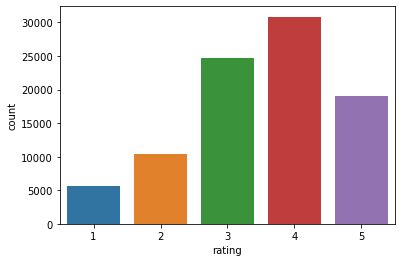

In [16]:
sns.countplot(ratings_train['rating'])

In [17]:
print('Rating Train Shape : {}'.format(ratings_train.shape))
print('Rating Test Shape : {}'.format(ratings_test.shape))

Rating Train Shape : (90570, 4)
Rating Test Shape : (9430, 4)


In [18]:
genres = list(items.columns[-18:])
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [19]:
genre_list = []
items[genres]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
list(items[genres].loc[0][items[genres].loc[0]==1].index)

['Animation', "Children's", 'Comedy']

In [35]:
genre_list = []
for i in range(len(items)):
    str1 = ','.join(list(items[genres].loc[i][items[genres].loc[i]==1].index))
    genre_list.append(str1)
    

In [36]:
genre_list

["Animation,Children's,Comedy",
 'Action,Adventure,Thriller',
 'Thriller',
 'Action,Comedy,Drama',
 'Crime,Drama,Thriller',
 'Drama',
 'Drama,Sci-Fi',
 "Children's,Comedy,Drama",
 'Drama',
 'Drama,War',
 'Crime,Thriller',
 'Crime,Thriller',
 'Comedy',
 'Drama,Romance',
 'Drama',
 'Comedy,Romance',
 'Action,Comedy,Crime,Horror,Thriller',
 'Drama',
 'Drama',
 'Drama,Romance',
 'Action,Adventure,Comedy,Musical,Thriller',
 'Action,Drama,War',
 'Drama,Thriller',
 'Action,Adventure,Crime',
 'Comedy',
 'Comedy',
 'Action',
 'Action,Drama,Thriller',
 'Action,Adventure,Comedy,Crime',
 'Drama',
 'Drama,Thriller,War',
 'Documentary',
 'Action,Romance,Thriller',
 'Comedy,Drama',
 "Adventure,Children's,Drama",
 'Drama,Romance',
 'Drama',
 'Sci-Fi,Thriller',
 'Action,Crime,Sci-Fi',
 'Comedy',
 'Comedy',
 'Comedy',
 'Drama,Thriller',
 'Drama,Thriller',
 'Comedy,Drama',
 'Drama',
 'Comedy,Drama',
 'Documentary',
 'Comedy,Romance',
 'Action,Adventure,Romance,Sci-Fi,War',
 'Drama,Romance,War,Western',
 

### Content Based Filtering


In [51]:
df_items = pd.read_csv('items_content_based_final.csv')

In [52]:
keywords = []
for i in range(len(df_items)):
    summary = df_items.loc[i]['movie_summary']
    r = Rake() #### Rapid Automatic Keyword Extraction algorithm
    r.extract_keywords_from_text(summary)
    key_words_dict_scores = r.get_word_degrees()
    #df_items.loc[i,"Key_words"] = pd.Series(key_words_dict_scores.keys())
    keywords.append(key_words_dict_scores.keys())

In [53]:
def convertTuple(tup): 
    str =  ' '.join(tup) 
    return str

In [59]:
df_items['Key_words'] = keywords

In [60]:
df_items['Key_words'] = df_items['Key_words'].apply(convertTuple)

In [61]:
df_items['Key_words'].head()

0    computer animated disney media franchise fourt...
1    timothy dalton resigned spain 7 million eon pr...
2    allison anders four frame story set los angele...
3    novel personal effects second job 300 singes c...
4    inside jon amiel realize guest lecture includi...
Name: Key_words, dtype: object

In [62]:
for idx,row in df_items.iterrows():
    df_items.loc[idx,'Key_words'] = ' '.join(genre_list[idx].lower().split(','))+ ' '+row['Key_words']

In [63]:
row

movie id                                                      1682
movie title              Scream of Stone (Schrei aus Stein) (1991)
genres                                                       Drama
movie_summary    Scream of Stone (German: Cerro Torre: Schrei a...
Key_words        several scenes filmed close supposed first con...
Name: 1681, dtype: object

In [64]:
df_items['Key_words'].head()

0    animation children's comedy computer animated ...
1    action adventure thriller timothy dalton resig...
2    thriller allison anders four frame story set l...
3    action comedy drama novel personal effects sec...
4    crime drama thriller inside jon amiel realize ...
Name: Key_words, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1), min_df=0.0001, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_items['Key_words'])

In [67]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [68]:
tfidf_matrix

<1682x23615 sparse matrix of type '<class 'numpy.float64'>'
	with 135774 stored elements in Compressed Sparse Row format>

In [168]:
indices = pd.Series(df_items['movie title'])
def content_based_recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    # getting the indexes of the 10 most similar movies
    indexes = list(score_series.index)
    for i in indexes:
        recommended_movies.append((list(df_items.index)[i]+1,score_series[i]))
    return recommended_movies

In [99]:
content_based_recommendations("Forrest Gump (1994)")[:10] ### Top 10 Recommendations from content Based 

[(97, 0.16170416815215485),
 (215, 0.14447377989267818),
 (64, 0.14389867686031688),
 (663, 0.14214612847995844),
 (419, 0.13495656102498832),
 (286, 0.13293142772504665),
 (143, 0.13014297038524486),
 (1438, 0.1295075265337977),
 (191, 0.1286882490159553),
 (205, 0.12740790348068518)]

### Collaborative Filtering


In [100]:
ratings_table = pd.pivot_table(data=ratings,values='rating',index='user id',columns='movie id')

In [101]:
ratings_table.fillna(0,inplace=True)

In [102]:
ratings_table

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
from scipy.sparse import csr_matrix
ratings_table = pd.pivot_table(data=ratings,values='rating',index='movie id',columns='user id').fillna(0)
sparse_ratings = csr_matrix(ratings_table)


In [107]:
from sklearn.neighbors import NearestNeighbors
#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=15, n_jobs=-1)
# fit the dataset
model_knn.fit(sparse_ratings)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [109]:
movie_ids = ratings['movie id'].unique()
movie_id_mapper=dict()
for idx,row in items.iterrows():
    if row['movie id'] in movie_ids:
        movie_id_mapper[row['movie title']]=row['movie id']
    else:
        print(row['movie id'])

In [110]:
len(movie_ids)

1682

In [111]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
movie_id_mapper.items()

dict_items([('Toy Story (1995)', 1), ('GoldenEye (1995)', 2), ('Four Rooms (1995)', 3), ('Get Shorty (1995)', 4), ('Copycat (1995)', 5), ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 6), ('Twelve Monkeys (1995)', 7), ('Babe (1995)', 8), ('Dead Man Walking (1995)', 9), ('Richard III (1995)', 10), ('Seven (Se7en) (1995)', 11), ('Usual Suspects, The (1995)', 12), ('Mighty Aphrodite (1995)', 13), ('Postino, Il (1994)', 14), ("Mr. Holland's Opus (1995)", 15), ('French Twist (Gazon maudit) (1995)', 16), ('From Dusk Till Dawn (1996)', 17), ('White Balloon, The (1995)', 18), ("Antonia's Line (1995)", 19), ('Angels and Insects (1995)', 20), ('Muppet Treasure Island (1996)', 21), ('Braveheart (1995)', 22), ('Taxi Driver (1976)', 23), ('Rumble in the Bronx (1995)', 24), ('Birdcage, The (1996)', 25), ('Brothers McMullen, The (1995)', 26), ('Bad Boys (1995)', 27), ('Apollo 13 (1995)', 28), ('Batman Forever (1995)', 29), ('Belle de jour (1967)', 30), ('Crimson Tide (1995)', 31), ('Crumb (

In [209]:
def collaborative_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    
    # fit
    model_knn.fit(data)
    # get input movie index
    idx = movie_id_mapper[fav_movie]
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=20+1)
    
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    rec=[]
    print('Recommendations for {} using Collaborative Filtering:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        rec.append((idx,dist))
    
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))
        if i+1>=n_recommendations:
            break
    return rec

In [210]:
d=dict()
final_result=[]
for x,y in content_based_result:
    d[x]=y
for movie_id,distance in colab_based_result:
    final_result.append((movie_id,d.get(movie_id,0)+distance))
    


In [211]:
def Hybrid_Recommendation_Model(model_knn,sparse_ratings,movie_id_mapper,MOVIE_NAME,n_recommendations):
    colab_based_result = collaborative_recommendation(model_knn,sparse_ratings,movie_id_mapper,MOVIE_NAME,n_recommendations=n_recommendations)
    content_based_result = content_based_recommendations(MOVIE_NAME)
    content_based_distance=dict()
    final_result=[]
    for movie_id,distance in content_based_result:
        content_based_distance[movie_id]=distance
    for movie_id,distance in colab_based_result:
        final_result.append((movie_id,content_based_distance.get(movie_id,0)+distance))
    final_result=sorted(final_result,key= lambda x:x[1],reverse=True)[:n_recommendations]
    reverse_mapper = {v: k for k, v in movie_id_mapper.items()}
    rec=[]
    print('\n\n')
    print('Recommendations for {} using Hybrid Recommendation Model:'.format(MOVIE_NAME))
    for i, (idx, dist) in enumerate(final_result):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))
    

In [212]:
Hybrid_Recommendation_Model(model_knn,sparse_ratings,movie_id_mapper,'Godfather: Part II, The (1974)',n_recommendations=10)

Recommendations for Godfather: Part II, The (1974) using Collaborative Filtering:
1: Delicatessen (1991), with distance of 0.45474882691514695
2: Hudsucker Proxy, The (1994), with distance of 0.45268685918762885
3: Psycho (1960), with distance of 0.4522102377029352
4: Ghost (1990), with distance of 0.45181481369192555
5: Naked Gun 33 1/3: The Final Insult (1994), with distance of 0.45154181746066735
6: Free Willy (1993), with distance of 0.45054352541240894
7: Four Rooms (1995), with distance of 0.4477563470460487
8: Village of the Damned (1995), with distance of 0.44768106860572143
9: Aliens (1986), with distance of 0.44688704945049706
10: 12 Angry Men (1957), with distance of 0.4401065003915696



Recommendations for Godfather: Part II, The (1974) using Hybrid Recommendation Model:
1: GoodFellas (1990), with distance of 0.6233155611845274
2: Psycho (1960), with distance of 0.6030006648246634
3: Aliens (1986), with distance of 0.5321503879704748
4: Free Willy (1993), with distance of 